### Downloading Images from google

In [0]:
!pip install google_images_download

In [0]:
from google.colab import drive
drive.mount('./gdrive')

In [4]:
cd ./gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
##  !googleimagesdownload --keywords "sushi, ramen"

In [31]:
cd ..

/content/gdrive/My Drive/Colab Notebooks


### Preprocessing image data

In [0]:
train_path = "./downloads/"

In [8]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [62]:
train_batches = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator=train_batches.flow_from_directory(train_path, 
                                                         target_size=(224,224,),
                                                         classes=['sushi','ramen'],
                                                         batch_size=10,
                                                  subset='training')

valid_generator=train_batches.flow_from_directory(train_path, 
                                                         target_size=(224,224,),
                                                         classes=['sushi','ramen'],
                                                         batch_size=10,
                                                  subset='validation')                                   

Found 159 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_generator)

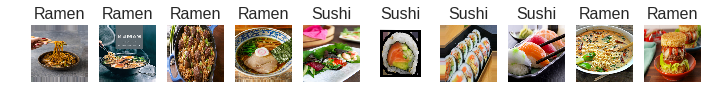

In [104]:
#test_imgs, test_labels = next(valid_generator)
plots(imgs*255, titles=["Ramen" if l[0]==0. else "Sushi" for l in labels  ])

### Building and training simple CNN

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
input_shape=(224,224,3)
num_classes=2

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [64]:
model.fit_generator(train_generator,
                   steps_per_epoch=20,
                    epochs=10,
                    validation_steps=1,
                   verbose=2,
                    validation_data=valid_generator)

Epoch 1/10
 - 16s - loss: 8.2478 - acc: 0.4883 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 2/10
 - 11s - loss: 7.9168 - acc: 0.5088 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/10
 - 13s - loss: 8.3625 - acc: 0.4812 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 12s - loss: 7.8807 - acc: 0.5111 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 11s - loss: 8.0060 - acc: 0.5033 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 6/10
 - 13s - loss: 8.1842 - acc: 0.4922 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 7/10
 - 12s - loss: 7.8618 - acc: 0.5122 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 12s - loss: 8.3816 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 12s - loss: 8.1842 - acc: 0.4922 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 10/10
 - 13s - loss: 7.9974 - acc: 0.5038 - val_loss: 4.8354 - val_acc: 0.7000


In [0]:
##model.save('./models/sushi.h5')  size is 1GB

## Using Pretrained VGG16 Model

### Fine tuning VGG16 model

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

In [70]:
type(vgg16_model) ## its Model we need Sequential model

keras.engine.training.Model

In [0]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [0]:
model.summary()

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

### Train the vgg16

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [83]:
model.fit_generator(train_generator,
                   steps_per_epoch=20,
                    epochs=30,
                    validation_steps=1,
                   verbose=2,
                    validation_data=valid_generator)

Epoch 1/30
 - 14s - loss: 0.3274 - acc: 0.8500 - val_loss: 0.2092 - val_acc: 0.9000
Epoch 2/30
 - 11s - loss: 0.3663 - acc: 0.8450 - val_loss: 0.5558 - val_acc: 0.7500
Epoch 3/30
 - 12s - loss: 0.2664 - acc: 0.8939 - val_loss: 0.1360 - val_acc: 1.0000
Epoch 4/30
 - 11s - loss: 0.2801 - acc: 0.9094 - val_loss: 0.5443 - val_acc: 0.9000
Epoch 5/30
 - 11s - loss: 0.1961 - acc: 0.9200 - val_loss: 0.0441 - val_acc: 1.0000
Epoch 6/30
 - 12s - loss: 0.2088 - acc: 0.9150 - val_loss: 0.2885 - val_acc: 0.8750
Epoch 7/30
 - 11s - loss: 0.2486 - acc: 0.8894 - val_loss: 0.2924 - val_acc: 0.9000
Epoch 8/30
 - 10s - loss: 0.2343 - acc: 0.8744 - val_loss: 0.1877 - val_acc: 0.9000
Epoch 9/30
 - 11s - loss: 0.2180 - acc: 0.9345 - val_loss: 0.4595 - val_acc: 0.8000
Epoch 10/30
 - 12s - loss: 0.2083 - acc: 0.9139 - val_loss: 0.0319 - val_acc: 1.0000
Epoch 11/30
 - 10s - loss: 0.3832 - acc: 0.8650 - val_loss: 0.1290 - val_acc: 1.0000
Epoch 12/30
 - 12s - loss: 0.1875 - acc: 0.9200 - val_loss: 0.0406 - val_a

In [0]:
#model.save('./models/sushi.h5')

### Predicting

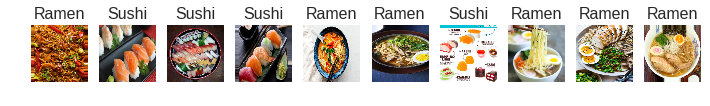

In [98]:
test_imgs, test_labels = next(valid_generator)
plots(test_imgs*255, titles=["Ramen" if l[0]==0. else "Sushi" for l in test_labels  ])

In [92]:
test_labels ## [0,1] is for ramen  

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)